In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [5]:
data.shape

(1000, 5)

In [6]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,27.256414,7.303434,15.115801,20.899332,27.420184,33.607990,39.992942
humidity,1000.0,50.421038,17.531394,20.193096,34.464456,51.124034,65.627903,79.964824
wind_speed,1000.0,10.048115,5.813484,0.000233,5.227020,10.012278,15.182071,19.956417
solar_irradiance,1000.0,541.337543,257.840410,100.588052,317.710693,535.851355,763.786729,999.601933
energy_consumption,1000.0,272.347395,129.064474,50.013823,160.238303,272.569144,382.997053,498.987225


In [7]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [8]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [9]:
X = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y = data['energy_consumption'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  #Input Layer with 64 neurons
    Dense(32, activation='relu'),  #Hidden layer with 32 neurons
    Dense(1)  #Output layer for regression with 1 neuron
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82982.8828 - mae: 259.7002 - val_loss: 83417.0781 - val_mae: 258.4787
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90011.3125 - mae: 271.4410 - val_loss: 82715.7344 - val_mae: 257.1195
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87198.1875 - mae: 267.1866 - val_loss: 81643.2422 - val_mae: 255.0301
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87273.7266 - mae: 265.9851 - val_loss: 79996.6328 - val_mae: 251.7872
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87497.0938 - mae: 265.9324 - val_loss: 77570.8906 - val_mae: 246.9307
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82118.2031 - mae: 256.8857 - val_loss: 74252.1562 - val_mae: 240.1172
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77152.9609 - mae: 246.2592 - val_loss: 69910.7109 - val_mae: 230.8773
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75439.2344 - mae: 243.1276 - val_loss: 64467.9

In [15]:
test_loss, test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error:{test_mae:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18110.9180 - mae: 115.7486 
Test Mean Absolute Error:116.16


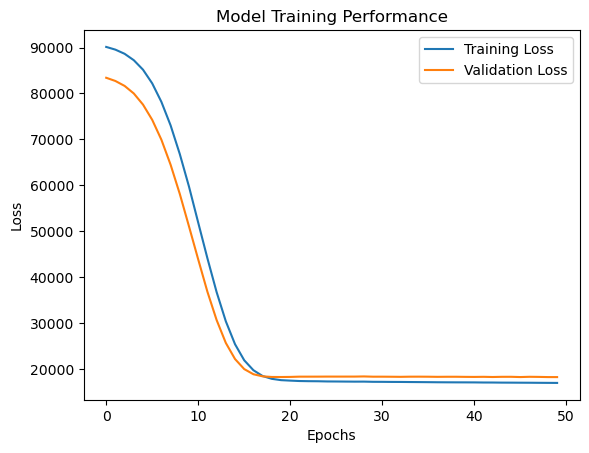

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [17]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[287.89496],
       [250.53767],
       [259.0155 ],
       [211.13107],
       [344.3858 ],
       [298.5806 ],
       [303.8252 ],
       [288.57928],
       [295.63202],
       [276.1277 ],
       [236.35686],
       [261.0826 ],
       [276.2481 ],
       [234.7711 ],
       [296.16437],
       [318.58978],
       [265.58838],
       [317.97165],
       [300.1422 ],
       [247.57524],
       [277.84583],
       [286.20236],
       [280.27042],
       [279.8575 ],
       [251.68977],
       [244.11198],
       [254.79527],
       [316.0711 ],
       [317.47852],
       [264.53986],
       [236.05829],
       [312.7246 ],
       [293.87726],
       [267.59613],
       [312.27554],
       [294.73337],
       [215.53693],
       [252.20224],
       [283.5185 ],
       [242.9742 ],
       [246.60039],
       [248.374  ],
       [253.27429],
       [252.91595],
       [273.7337 ],
       [248.92369],
       [268.99048],
       [256.6187 ],
       [297.45428],
       [292.43604],


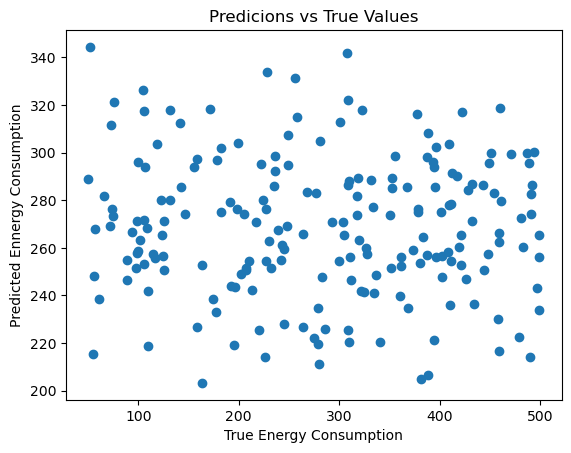

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Ennergy Consumption')
plt.title('Predicions vs True Values')
plt.show()